#📌 Extracción

In [1]:
#Conexion Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importacion de archivo y vision del head
datos = pd.read_json('/content/drive/MyDrive/Colab Notebooks/CHALLENGE TELECOMX/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [4]:
#normalizar datos anidados
datos = pd.json_normalize(datos.to_dict(orient='records'))
datos.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
#revision de datos y formato
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Diccionario de Datos
- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [6]:
#revision de datos inconsistentes
print(pd.unique(datos['Churn']))
print(pd.unique(datos['account.Contract']))
print(pd.unique(datos['account.PaymentMethod']))
print(pd.unique(datos['account.PaperlessBilling']))
print(pd.unique(datos['internet.InternetService']))
print(pd.unique(datos['internet.TechSupport']))
print(pd.unique(datos['customer.SeniorCitizen']))
print(pd.unique(datos['customer.Partner']))
print(pd.unique(datos['customer.Dependents']))


['No' 'Yes' '']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
['Yes' 'No']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
[0 1]
['Yes' 'No']
['Yes' 'No']


In [7]:
# Contar valores vacíos en la columna 'Churn'
datos['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [8]:
# Eliminar filas donde 'Churn' esté vacío
datos = datos[datos['Churn'].isin(['Yes', 'No'])].copy()


In [9]:
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')
datos['account.Charges.Total'].dtype



dtype('float64')

In [10]:
# creamos Lista de columnas con valores 'Yes'/'No'
columnas_booleanas = [
    'Churn',
    'account.PaperlessBilling',
    'customer.Partner',
    'customer.Dependents',
    'internet.TechSupport'
]

# Convertir valores a booleanos
for col in columnas_booleanas:
    datos[col] = datos[col].map({'Yes': True, 'No': False})

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       5517 non-null   object 
 1

In [12]:
#chequeo estado DF
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,True,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,False,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,False,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,False,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,True,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


## Agregar Columnas

In [13]:

# Calcular Cuentas.diarias (costo diario estimado)
datos['Cuentas.diarias'] = datos['account.Charges.Monthly'] / 30

# Calcular Cuentas.Prom.Periodo (promedio mensual real)
datos['Cuentas.Prom.Periodo'] = datos['account.Charges.Total'] / datos['customer.tenure']

In [14]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas.diarias,Cuentas.Prom.Periodo
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,True,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667,65.922222
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,False,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667,60.266667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,False,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,False,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,True,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333


In [15]:
#Ajusta nombre de Columnas
datos = datos.rename(columns={
    'customerID': 'cliente.id',
    'Churn': 'cliente.abandono',
    'customer.gender': 'cliente.genero',
    'customer.SeniorCitizen': 'cliente.adulto_mayor',
    'customer.Partner': 'cliente.tiene_pareja',
    'customer.Dependents': 'cliente.dependientes',
    'customer.tenure': 'cliente.antiguedad_meses',

    'phone.PhoneService': 'telefono.servicio',
    'phone.MultipleLines': 'telefono.lineas_multiples',

    'internet.InternetService': 'internet.tipo_servicio',
    'internet.OnlineSecurity': 'internet.seguridad_en_linea',
    'internet.OnlineBackup': 'internet.respaldo_en_linea',
    'internet.DeviceProtection': 'internet.proteccion_dispositivo',
    'internet.TechSupport': 'internet.soporte_tecnico',
    'internet.StreamingTV': 'internet.tv_streaming',
    'internet.StreamingMovies': 'internet.peliculas_streaming',

    'account.Contract': 'cuenta.tipo_contrato',
    'account.PaperlessBilling': 'cuenta.facturacion_sin_papel',
    'account.PaymentMethod': 'cuenta.metodo_pago',
    'account.Charges.Monthly': 'cuenta.cargo_mensual',
    'account.Charges.Total': 'cuenta.cargo_total'
})


In [16]:
#Chequeo cambio de nombre
datos.columns


Index(['cliente.id', 'cliente.abandono', 'cliente.genero',
       'cliente.adulto_mayor', 'cliente.tiene_pareja', 'cliente.dependientes',
       'cliente.antiguedad_meses', 'telefono.servicio',
       'telefono.lineas_multiples', 'internet.tipo_servicio',
       'internet.seguridad_en_linea', 'internet.respaldo_en_linea',
       'internet.proteccion_dispositivo', 'internet.soporte_tecnico',
       'internet.tv_streaming', 'internet.peliculas_streaming',
       'cuenta.tipo_contrato', 'cuenta.facturacion_sin_papel',
       'cuenta.metodo_pago', 'cuenta.cargo_mensual', 'cuenta.cargo_total',
       'Cuentas.diarias', 'Cuentas.Prom.Periodo'],
      dtype='object')

## Crea DF con clientes que se fueron y se quedaron

In [17]:
#crea df con clientes que abandonaron
clientes_abandonan = datos[datos['cliente.abandono'] == True].copy()


In [18]:
#crea df con clientes que se quedaron
clientes_se_quedaron = datos[datos['cliente.abandono'] == False].copy()

In [19]:
clientes_abandonan.shape  # Te muestra cuántos registros hay en los clientes que abandonaron


(1869, 23)

In [20]:
clientes_abandonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cliente.id                       1869 non-null   object 
 1   cliente.abandono                 1869 non-null   bool   
 2   cliente.genero                   1869 non-null   object 
 3   cliente.adulto_mayor             1869 non-null   int64  
 4   cliente.tiene_pareja             1869 non-null   bool   
 5   cliente.dependientes             1869 non-null   bool   
 6   cliente.antiguedad_meses         1869 non-null   int64  
 7   telefono.servicio                1869 non-null   object 
 8   telefono.lineas_multiples        1869 non-null   object 
 9   internet.tipo_servicio           1869 non-null   object 
 10  internet.seguridad_en_linea      1869 non-null   object 
 11  internet.respaldo_en_linea       1869 non-null   object 
 12  internet.proteccion_dispo

In [21]:
clientes_abandonan.head()  # Muestra los primeros registros del DF

,cliente.id,cliente.abandono,cliente.genero,cliente.adulto_mayor,cliente.tiene_pareja,cliente.dependientes,cliente.antiguedad_meses,telefono.servicio,telefono.lineas_multiples,internet.tipo_servicio,...,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.tipo_contrato,cuenta.facturacion_sin_papel,cuenta.metodo_pago,cuenta.cargo_mensual,cuenta.cargo_total,Cuentas.diarias,Cuentas.Prom.Periodo
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,False,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,False,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,True,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333
18,0022-TCJCI,True,Male,1,False,False,45,Yes,No,DSL,...,False,No,Yes,One year,False,Credit card (automatic),62.7,2791.50,2.090000,62.033333
19,0023-HGHWL,True,Male,1,False,False,1,No,No phone service,DSL,...,False,No,No,Month-to-month,True,Electronic check,25.1,25.10,0.836667,25.100000


### 📋 Columnas Finales del DataFrame Depurado

- cliente.id  (SACAR)
- cliente.abandono  (SACAR)
- cliente.genero  
- cliente.adulto_mayor  
- cliente.tiene_pareja  (SACAR)
- cliente.dependientes  (SACAR)
- cliente.antiguedad_meses  
- telefono.servicio  
- telefono.lineas_multiples  
- internet.tipo_servicio  
- internet.seguridad_en_linea  
- internet.respaldo_en_linea  
- internet.proteccion_dispositivo  
- internet.soporte_tecnico  
- internet.tv_streaming  
- internet.peliculas_streaming  
- cuenta.tipo_contrato  
- cuenta.facturacion_sin_papel  
- cuenta.metodo_pago  
- cuenta.cargo_mensual  
- cuenta.cargo_total  
- Cuentas.diarias  
- Cuentas.Prom.Periodo  


In [22]:
#sacare columnas irrelevantes para el analisis final
columnas_a_excluir = [
    'cliente.id',
    'cliente.abandono',
    'cliente.tiene_pareja',
    'cliente.dependientes'
]

clientes_abandonan_depurado = clientes_abandonan.drop(columns=columnas_a_excluir).copy()


In [23]:
clientes_abandonan_depurado.head()

,cliente.genero,cliente.adulto_mayor,cliente.antiguedad_meses,telefono.servicio,telefono.lineas_multiples,internet.tipo_servicio,internet.seguridad_en_linea,internet.respaldo_en_linea,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.tipo_contrato,cuenta.facturacion_sin_papel,cuenta.metodo_pago,cuenta.cargo_mensual,cuenta.cargo_total,Cuentas.diarias,Cuentas.Prom.Periodo
2,Male,0,4,Yes,No,Fiber optic,No,No,Yes,False,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,Male,1,13,Yes,No,Fiber optic,No,Yes,Yes,False,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,Female,1,3,Yes,No,Fiber optic,No,No,No,True,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333
18,Male,1,45,Yes,No,DSL,Yes,No,Yes,False,No,Yes,One year,False,Credit card (automatic),62.7,2791.50,2.090000,62.033333
19,Male,1,1,No,No phone service,DSL,No,No,No,False,No,No,Month-to-month,True,Electronic check,25.1,25.10,0.836667,25.100000


In [24]:
clientes_abandonan_depurado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cliente.genero                   1869 non-null   object 
 1   cliente.adulto_mayor             1869 non-null   int64  
 2   cliente.antiguedad_meses         1869 non-null   int64  
 3   telefono.servicio                1869 non-null   object 
 4   telefono.lineas_multiples        1869 non-null   object 
 5   internet.tipo_servicio           1869 non-null   object 
 6   internet.seguridad_en_linea      1869 non-null   object 
 7   internet.respaldo_en_linea       1869 non-null   object 
 8   internet.proteccion_dispositivo  1869 non-null   object 
 9   internet.soporte_tecnico         1756 non-null   object 
 10  internet.tv_streaming            1869 non-null   object 
 11  internet.peliculas_streaming     1869 non-null   object 
 12  cuenta.tipo_contrato     

In [25]:
#revisa los datos registrados por campos, para hacer ajustes de columnas
for col in clientes_abandonan_depurado.select_dtypes(include='object').columns:
    print(f"{col} → {clientes_abandonan_depurado[col].unique()}")


cliente.genero → ['Male' 'Female']
telefono.servicio → ['Yes' 'No']
telefono.lineas_multiples → ['No' 'No phone service' 'Yes']
internet.tipo_servicio → ['Fiber optic' 'DSL' 'No']
internet.seguridad_en_linea → ['No' 'Yes' 'No internet service']
internet.respaldo_en_linea → ['No' 'Yes' 'No internet service']
internet.proteccion_dispositivo → ['Yes' 'No' 'No internet service']
internet.soporte_tecnico → [False True nan]
internet.tv_streaming → ['No' 'Yes' 'No internet service']
internet.peliculas_streaming → ['No' 'Yes' 'No internet service']
cuenta.tipo_contrato → ['Month-to-month' 'One year' 'Two year']
cuenta.metodo_pago → ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [26]:
#transforma a categoria el campo genero
clientes_abandonan_depurado['cliente.genero'] = (
    clientes_abandonan_depurado['cliente.genero']
    .map({'Male': 'Hombre', 'Female': 'Mujer'})
    .astype('category')
)


In [27]:
#el campo nan lo llena como no aplica
clientes_abandonan_depurado['internet.soporte_tecnico'] = (
    clientes_abandonan_depurado['internet.soporte_tecnico']
    .fillna('No aplica')
)



In [28]:
# Reemplazar 'No phone service' por 'No' en telefono.lineas_multiples
clientes_abandonan_depurado['telefono.lineas_multiples'] = (
    clientes_abandonan_depurado['telefono.lineas_multiples']
    .replace('No phone service', 'No')
)


In [29]:
# Reemplazar 'No internet service' por 'No aplica' en las columnas de servicios de internet
columnas_internet = [
    'internet.seguridad_en_linea',
    'internet.respaldo_en_linea',
    'internet.proteccion_dispositivo',
    'internet.tv_streaming',
    'internet.peliculas_streaming'
]

for col in columnas_internet:
    clientes_abandonan_depurado[col] = (
        clientes_abandonan_depurado[col]
        .replace('No internet service', 'No aplica')
    )


In [30]:
clientes_abandonan_depurado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   cliente.genero                   1869 non-null   category
 1   cliente.adulto_mayor             1869 non-null   int64   
 2   cliente.antiguedad_meses         1869 non-null   int64   
 3   telefono.servicio                1869 non-null   object  
 4   telefono.lineas_multiples        1869 non-null   object  
 5   internet.tipo_servicio           1869 non-null   object  
 6   internet.seguridad_en_linea      1869 non-null   object  
 7   internet.respaldo_en_linea       1869 non-null   object  
 8   internet.proteccion_dispositivo  1869 non-null   object  
 9   internet.soporte_tecnico         1869 non-null   object  
 10  internet.tv_streaming            1869 non-null   object  
 11  internet.peliculas_streaming     1869 non-null   object  
 12  cuenta.tipo

In [31]:
for col in clientes_abandonan_depurado.select_dtypes(include='object').columns:
    print(f"{col} → {clientes_abandonan_depurado[col].unique()}")

telefono.servicio → ['Yes' 'No']
telefono.lineas_multiples → ['No' 'Yes']
internet.tipo_servicio → ['Fiber optic' 'DSL' 'No']
internet.seguridad_en_linea → ['No' 'Yes' 'No aplica']
internet.respaldo_en_linea → ['No' 'Yes' 'No aplica']
internet.proteccion_dispositivo → ['Yes' 'No' 'No aplica']
internet.soporte_tecnico → [False True 'No aplica']
internet.tv_streaming → ['No' 'Yes' 'No aplica']
internet.peliculas_streaming → ['No' 'Yes' 'No aplica']
cuenta.tipo_contrato → ['Month-to-month' 'One year' 'Two year']
cuenta.metodo_pago → ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#📊 Carga y análisis

In [32]:
#analisis estadistico por campos
clientes_abandonan_depurado[['cliente.antiguedad_meses', 'cuenta.cargo_mensual',
                    'cuenta.cargo_total', 'Cuentas.diarias',
                    'Cuentas.Prom.Periodo']].describe()


,cliente.antiguedad_meses,cuenta.cargo_mensual,cuenta.cargo_total,Cuentas.diarias,Cuentas.Prom.Periodo
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378,74.433154
std,19.531123,24.666053,1890.822994,0.822202,24.961209
min,1.000000,18.850000,18.850000,0.628333,14.150000
25%,2.000000,56.150000,134.500000,1.871667,57.975000
50%,10.000000,79.650000,703.550000,2.655000,79.312500
75%,29.000000,94.200000,2331.300000,3.140000,93.933784
max,72.000000,118.350000,8684.800000,3.945000,121.400000


In [33]:
# Lista de columnas categóricas a analizar
columnas_categoricas = [
    'cliente.genero',
    'cliente.adulto_mayor',
    'telefono.servicio',
    'telefono.lineas_multiples',
    'internet.tipo_servicio',
    'internet.seguridad_en_linea',
    'internet.respaldo_en_linea',
    'internet.proteccion_dispositivo',
    'internet.soporte_tecnico',
    'internet.tv_streaming',
    'internet.peliculas_streaming',
    'cuenta.tipo_contrato',
    'cuenta.facturacion_sin_papel',
    'cuenta.metodo_pago'
]

# Mostrar conteos de valores por columna
for col in columnas_categoricas:
    print(f"\n📊 {col}")
    print(clientes_abandonan_depurado[col].value_counts(dropna=False))




📊 cliente.genero
cliente.genero
Mujer     939
Hombre    930
Name: count, dtype: int64

📊 cliente.adulto_mayor
cliente.adulto_mayor
0    1393
1     476
Name: count, dtype: int64

📊 telefono.servicio
telefono.servicio
Yes    1699
No      170
Name: count, dtype: int64

📊 telefono.lineas_multiples
telefono.lineas_multiples
No     1019
Yes     850
Name: count, dtype: int64

📊 internet.tipo_servicio
internet.tipo_servicio
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

📊 internet.seguridad_en_linea
internet.seguridad_en_linea
No           1461
Yes           295
No aplica     113
Name: count, dtype: int64

📊 internet.respaldo_en_linea
internet.respaldo_en_linea
No           1233
Yes           523
No aplica     113
Name: count, dtype: int64

📊 internet.proteccion_dispositivo
internet.proteccion_dispositivo
No           1211
Yes           545
No aplica     113
Name: count, dtype: int64

📊 internet.soporte_tecnico
internet.soporte_tecnico
False        1446

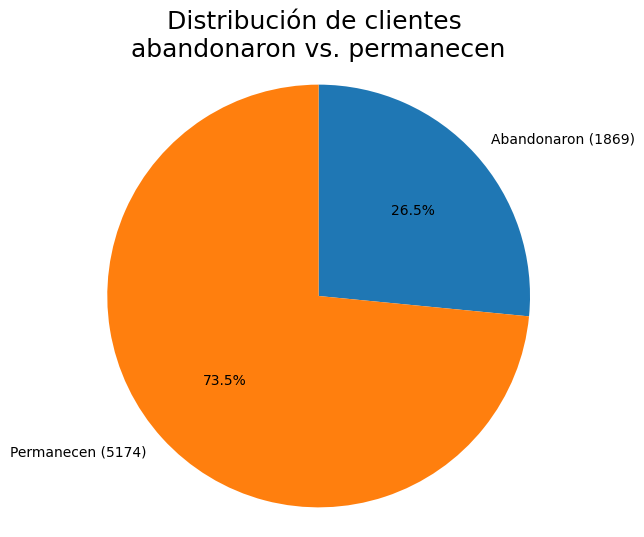

In [34]:
# Contar los valores con orden explícito
churn_counts = datos['cliente.abandono'].value_counts()

# Etiquetas con nombre y cantidad en orden correcto
labels = [
    f"Abandonaron ({churn_counts.loc[True]})",
    f"Permanecen ({churn_counts.loc[False]})"
]

# Crear gráfico circular con conteo + porcentaje
plt.figure(figsize=(6, 6))
plt.pie(
    [churn_counts.loc[True], churn_counts.loc[False]],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Distribución de clientes \nabandonaron vs. permanecen', fontsize=18)
plt.axis('equal')
plt.show()


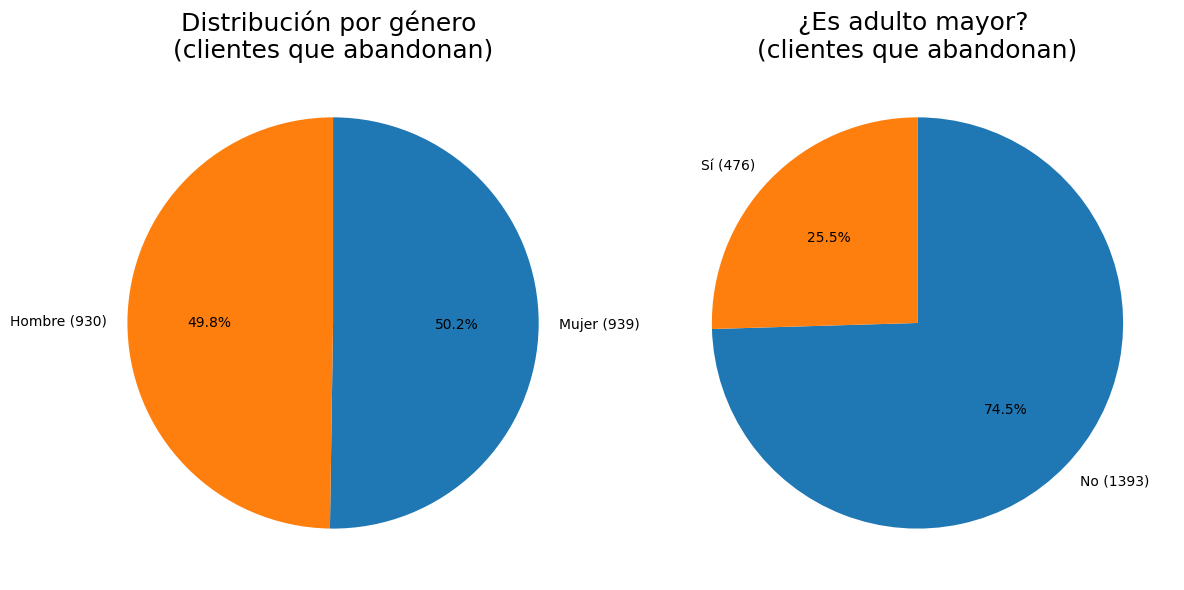

In [35]:
## Graficar

genero_counts = clientes_abandonan_depurado['cliente.genero'].value_counts()
adulto_mayor_counts = clientes_abandonan_depurado['cliente.adulto_mayor'].map({0: 'No', 1: 'Sí'}).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    genero_counts,
    labels=[f'{label} ({count})' for label, count in genero_counts.items()],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
axes[0].set_title('Distribución por género \n(clientes que abandonan)', fontsize=18)

axes[1].pie(
    adulto_mayor_counts,
    labels=[f'{label} ({count})' for label, count in adulto_mayor_counts.items()],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
axes[1].set_title('¿Es adulto mayor? \n(clientes que abandonan)', fontsize=18)

plt.tight_layout()
plt.show()


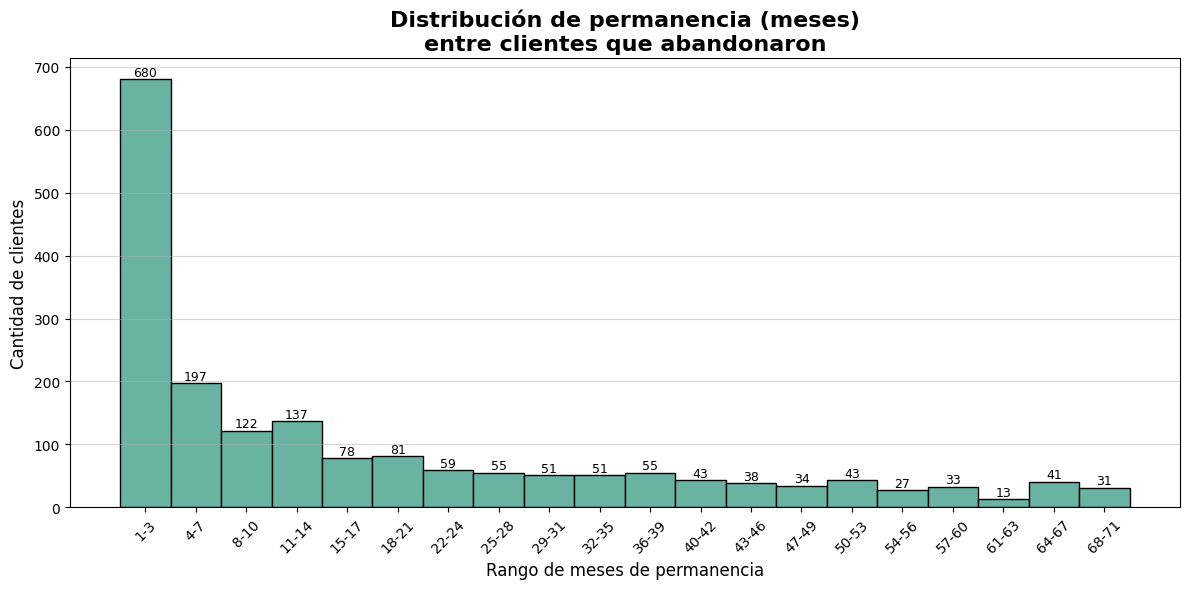

In [36]:
# Seleccionar la columna de interés
valores = clientes_abandonan_depurado['cliente.antiguedad_meses']


# Crear figura
plt.figure(figsize=(12, 6))

# Crear histograma y capturar conteo y bordes de bins
conteo, bins, patches = plt.hist(valores, bins=20, edgecolor='black', color='#69b3a2')

# Crear etiquetas para cada barra usando los rangos
etiquetas_rangos = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
posiciones = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# Reemplazar las etiquetas del eje X con los rangos
plt.xticks(ticks=posiciones, labels=etiquetas_rangos, rotation=45)

# Etiquetas sobre las barras
for count, x in zip(conteo, posiciones):
    if count > 0:
        plt.text(x, count + 1, str(int(count)), ha='center', va='bottom', fontsize=9)

# Título y estilo
plt.title('Distribución de permanencia (meses)\nentre clientes que abandonaron', fontsize=16, fontweight='bold')
plt.xlabel('Rango de meses de permanencia', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



In [37]:
# Filtrar los clientes con antigüedad entre 1 y 7 meses inclusive
clientes_abandonan_7meses = clientes_abandonan_depurado[
    (clientes_abandonan_depurado['cliente.antiguedad_meses'] >= 1) &
    (clientes_abandonan_depurado['cliente.antiguedad_meses'] <= 7)
].copy()

# Mostrar las primeras filas del nuevo DataFrame
clientes_abandonan_7meses.head()


,cliente.genero,cliente.adulto_mayor,cliente.antiguedad_meses,telefono.servicio,telefono.lineas_multiples,internet.tipo_servicio,internet.seguridad_en_linea,internet.respaldo_en_linea,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.tipo_contrato,cuenta.facturacion_sin_papel,cuenta.metodo_pago,cuenta.cargo_mensual,cuenta.cargo_total,Cuentas.diarias,Cuentas.Prom.Periodo
2,Hombre,0,4,Yes,No,Fiber optic,No,No,Yes,False,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333,70.212500
4,Mujer,1,3,Yes,No,Fiber optic,No,No,No,True,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667,89.133333
19,Hombre,1,1,No,No,DSL,No,No,No,False,No,No,Month-to-month,True,Electronic check,25.10,25.10,0.836667,25.100000
24,Mujer,0,4,Yes,No,No,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Month-to-month,False,Mailed check,20.35,76.35,0.678333,19.087500
25,Mujer,0,1,No,No,DSL,Yes,No,No,False,No,No,Month-to-month,False,Bank transfer (automatic),30.50,30.50,1.016667,30.500000


In [48]:
clientes_abandonan_7meses.to_csv('clientes_abandonan_7meses.csv', index=False)


In [38]:
# Lista de columnas categóricas a analizar
columnas_categoricas = [
    'cliente.genero',
    'cliente.adulto_mayor',
    'telefono.servicio',
    'telefono.lineas_multiples',
    'internet.tipo_servicio',
    'internet.seguridad_en_linea',
    'internet.respaldo_en_linea',
    'internet.proteccion_dispositivo',
    'internet.soporte_tecnico',
    'internet.tv_streaming',
    'internet.peliculas_streaming',
    'cuenta.tipo_contrato',
    'cuenta.facturacion_sin_papel',
    'cuenta.metodo_pago'
]

# Mostrar conteos de valores por columna
for col in columnas_categoricas:
    print(f"\n📊 {col}")
    print(clientes_abandonan_7meses[col].value_counts(dropna=False))


📊 cliente.genero
cliente.genero
Mujer     428
Hombre    407
Name: count, dtype: int64

📊 cliente.adulto_mayor
cliente.adulto_mayor
0    666
1    169
Name: count, dtype: int64

📊 telefono.servicio
telefono.servicio
Yes    749
No      86
Name: count, dtype: int64

📊 telefono.lineas_multiples
telefono.lineas_multiples
No     612
Yes    223
Name: count, dtype: int64

📊 internet.tipo_servicio
internet.tipo_servicio
Fiber optic    500
DSL            254
No              81
Name: count, dtype: int64

📊 internet.seguridad_en_linea
internet.seguridad_en_linea
No           693
No aplica     81
Yes           61
Name: count, dtype: int64

📊 internet.respaldo_en_linea
internet.respaldo_en_linea
No           631
Yes          123
No aplica     81
Name: count, dtype: int64

📊 internet.proteccion_dispositivo
internet.proteccion_dispositivo
No           627
Yes          127
No aplica     81
Name: count, dtype: int64

📊 internet.soporte_tecnico
internet.soporte_tecnico
False        679
No aplica     81
T

In [39]:
import pandas as pd

# Definir columnas categóricas
columnas_categoricas = [
    'cliente.genero',
    'cliente.adulto_mayor',
    'telefono.servicio',
    'telefono.lineas_multiples',
    'internet.tipo_servicio',
    'internet.seguridad_en_linea',
    'internet.respaldo_en_linea',
    'internet.proteccion_dispositivo',
    'internet.soporte_tecnico',
    'internet.tv_streaming',
    'internet.peliculas_streaming',
    'cuenta.tipo_contrato',
    'cuenta.facturacion_sin_papel',
    'cuenta.metodo_pago'
]

# Crear diccionario de comparación
comparacion_cat = {}

for col in columnas_categoricas:
    dist_abandonan = clientes_abandonan[col].value_counts(normalize=True)
    dist_se_quedan = clientes_se_quedaron[col].value_counts(normalize=True)
    comparacion_cat[col] = pd.DataFrame({
        'Clientes que abandonan': dist_abandonan,
        'Clientes que se quedan': dist_se_quedan
    })

# Unir todas las comparaciones
tabla_comparativa_cat = pd.concat(comparacion_cat, axis=0).fillna(0)

# Convertir a porcentaje
tabla_comparativa_cat_pct = tabla_comparativa_cat.applymap(lambda x: f"{x*100:.1f}%")

# Mostrar en pantalla
from IPython.display import display
display(tabla_comparativa_cat_pct)


<ipython-input-39-1284383810>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_comparativa_cat_pct = tabla_comparativa_cat.applymap(lambda x: f"{x*100:.1f}%")


Clientes que abandonan  \
cliente.genero                  Female                                     50.2%   
                                Male                                       49.8%   
cliente.adulto_mayor            0                                          74.5%   
                                1                                          25.5%   
telefono.servicio               Yes                                        90.9%   
                                No                                          9.1%   
telefono.lineas_multiples       No                                         45.4%   
                                No phone service                            9.1%   
                                Yes                                        45.5%   
internet.tipo_servicio          DSL                                        24.6%   
                                Fiber optic                                69.4%   
                                No                                          6.0%   
internet.seguridad_en_linea     No                                         78.2%   
                                Yes                                        15.8%   
                                No internet service                         6.0%   
internet.respaldo_en_linea      No                                         66.0%   
                                No internet service                         6.0%   
                                Yes                                        28.0%   
internet.proteccion_dispositivo No                                         64.8%   
                                Yes                                        29.2%   
                                No internet service                         6.0%   
internet.soporte_tecnico        0                                          82.3%   
                                1                                          17.7%   
internet.tv_streaming           No                                         50.4%   
                                No internet service                         6.0%   
                                Yes                                        43.6%   
internet.peliculas_streaming    No                                         50.2%   
                                No internet service                         6.0%   
                                Yes                                        43.8%   
cuenta.tipo_contrato            Month-to-month                             88.6%   
                                One year                                    8.9%   
                                Two year                                    2.6%   
cuenta.facturacion_sin_papel    1                                          74.9%   
                                0                                          25.1%   
cuenta.metodo_pago              Bank transfer (automatic)                  13.8%   
                                Credit card (automatic)                    12.4%   
                                Electronic check                           57.3%   
                                Mailed check                               16.5%   

                                                          Clientes que se quedan  
cliente.genero                  Female                                     49.3%  
                                Male                                       50.7%  
cliente.adulto_mayor            0                                          87.1%  
                                1                                          12.9%  
telefono.servicio               Yes                                        90.1%  
                                No                                          9.9%  
telefono.lineas_multiples       No                                         49.1%  
                                No phone service                            9.9%  
                                Ye

In [40]:
# Repetir el agrupamiento en rangos de 3 meses para asegurar consistencia
clientes_abandonan_depurado['rango_3_meses'] = pd.cut(
    clientes_abandonan_depurado['cliente.antiguedad_meses'],
    bins=range(1, clientes_abandonan_depurado['cliente.antiguedad_meses'].max() + 4, 3),
    right=True,
    include_lowest=True
)

# Crear tabla de frecuencias
tabla_rangos = (
    clientes_abandonan_depurado['rango_3_meses']
    .value_counts()
    .sort_index()
    .rename("Cantidad de clientes")
    .reset_index()
    .rename(columns={"index": "Rango de antigüedad"})
)

# Calcular acumulado
tabla_rangos['Acumulado'] = tabla_rangos['Cantidad de clientes'].cumsum()

# Calcular porcentaje por rango y acumulado
total_clientes = tabla_rangos['Cantidad de clientes'].sum()
tabla_rangos['% por rango'] = (tabla_rangos['Cantidad de clientes'] / total_clientes * 100).round(1)
tabla_rangos['% Acumulado'] = (tabla_rangos['Acumulado'] / total_clientes * 100).round(1)

# Calcular porcentaje de abandono por trimestre (asumiendo 3 meses por trimestre)
tabla_rangos['% abandono del trimestre'] = (tabla_rangos['Cantidad de clientes'] / 3 / total_clientes * 100).round(2)

tabla_rangos


,rango_3_meses,Cantidad de clientes,Acumulado,% por rango,% Acumulado,% abandono del trimestre
0,"(0.999, 4.0]",680,680,36.4,36.4,12.13
1,"(4.0, 7.0]",155,835,8.3,44.7,2.76
2,"(7.0, 10.0]",133,968,7.1,51.8,2.37
3,"(10.0, 13.0]",107,1075,5.7,57.5,1.91
4,"(13.0, 16.0]",89,1164,4.8,62.3,1.59
5,"(16.0, 19.0]",69,1233,3.7,66.0,1.23
6,"(19.0, 22.0]",62,1295,3.3,69.3,1.11
7,"(22.0, 25.0]",59,1354,3.2,72.4,1.05
8,"(25.0, 28.0]",40,1394,2.1,74.6,0.71
9,"(28.0, 31.0]",47,1441,2.5,77.1,0.84


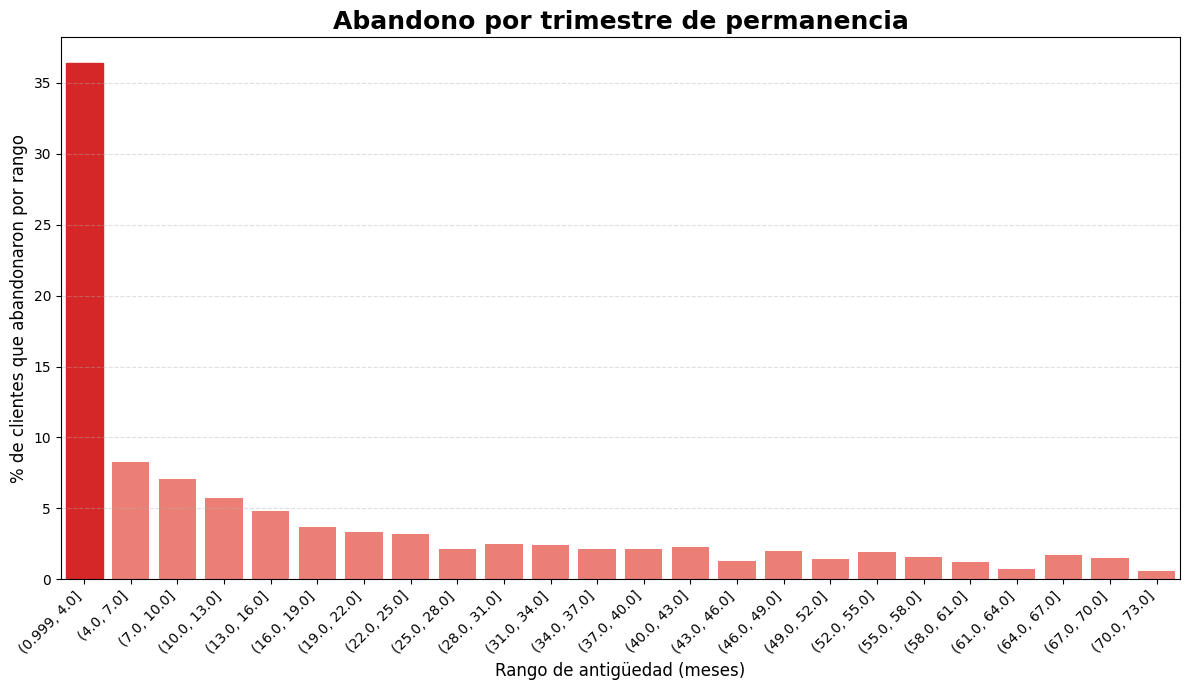

In [41]:
# Preparar gráfico de barras para destacar el impacto del primer trimestre
plt.figure(figsize=(12, 7))
sns.barplot(data=tabla_rangos, x='rango_3_meses', y='% por rango', color='#FF6F61')

# Resaltar el primer trimestre en otro color
bars = plt.gca().patches
for i, bar in enumerate(bars):
    if i == 0:
        bar.set_color('#D62728')  # rojo fuerte para el primer trimestre

# Títulos y etiquetas
plt.title('Abandono por trimestre de permanencia', fontsize=18, fontweight='bold')
plt.xlabel('Rango de antigüedad (meses)', fontsize=12)
plt.ylabel('% de clientes que abandonaron por rango', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


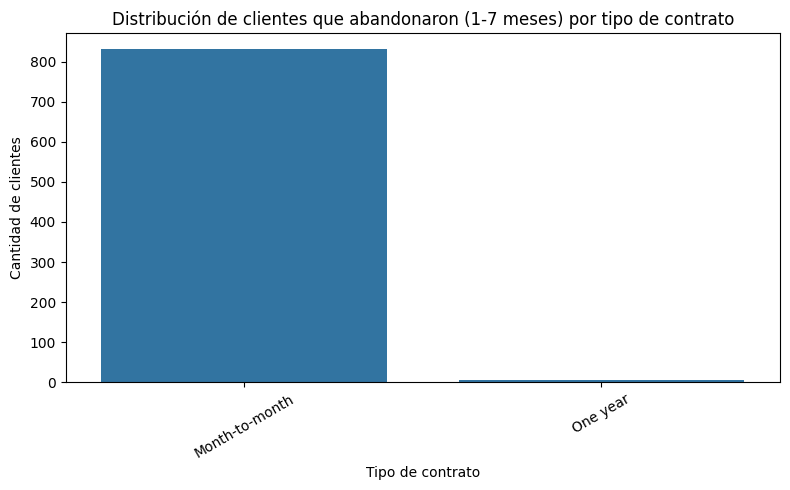

In [44]:


plt.figure(figsize=(8, 5))
sns.countplot(
    data=clientes_abandonan_7meses,
    x='cuenta.tipo_contrato',
    order=clientes_abandonan_7meses['cuenta.tipo_contrato'].value_counts().index
)
plt.title('Distribución de clientes que abandonaron (1-7 meses) por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


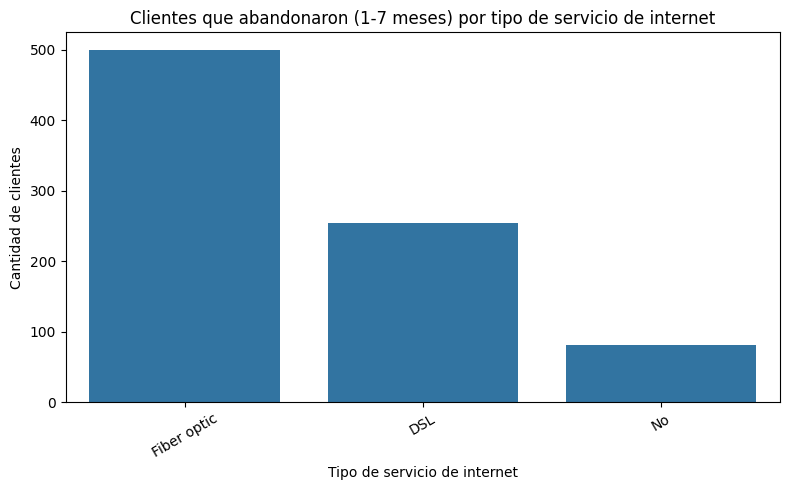

In [50]:
# Gráfico 2: Distribución por tipo de servicio de internet
plt.figure(figsize=(8, 5))
sns.countplot(
    data=clientes_abandonan_7meses,
    x='internet.tipo_servicio',
    order=clientes_abandonan_7meses['internet.tipo_servicio'].value_counts().index
)
plt.title('Clientes que abandonaron (1-7 meses) por tipo de servicio de internet')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


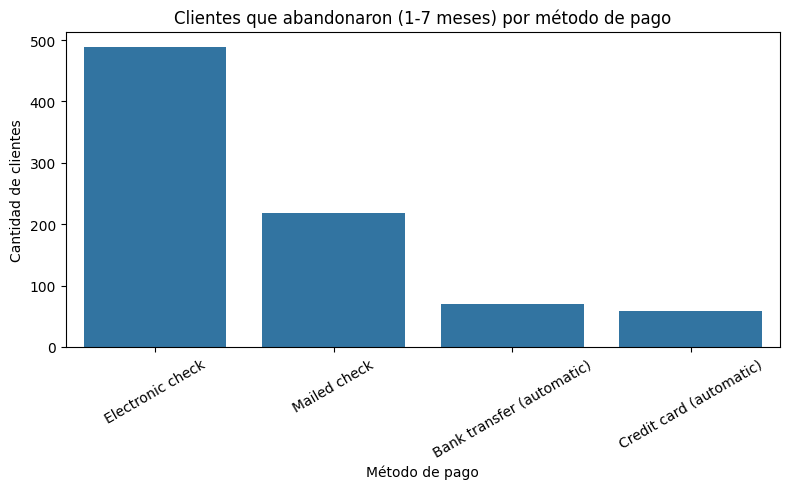

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=clientes_abandonan_7meses,
    x='cuenta.metodo_pago',
    order=clientes_abandonan_7meses['cuenta.metodo_pago'].value_counts().index
)
plt.title('Clientes que abandonaron (1-7 meses) por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<ipython-input-52-2222737829>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  servicios_binarios = clientes_abandonan_7meses[columnas_servicios].replace({'Yes': 1, 'No': 0, 'No aplica': 0, True: 1, False: 0})


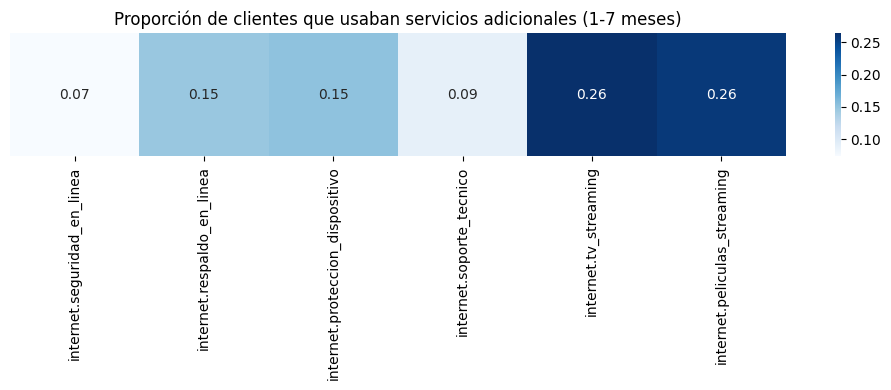

In [52]:
# Selección de columnas de servicios
columnas_servicios = [
    'internet.seguridad_en_linea',
    'internet.respaldo_en_linea',
    'internet.proteccion_dispositivo',
    'internet.soporte_tecnico',
    'internet.tv_streaming',
    'internet.peliculas_streaming'
]

# Convertir a binario
servicios_binarios = clientes_abandonan_7meses[columnas_servicios].replace({'Yes': 1, 'No': 0, 'No aplica': 0, True: 1, False: 0})

# Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(servicios_binarios.mean().to_frame().T, cmap='Blues', annot=True, fmt=".2f")
plt.title('Proporción de clientes que usaban servicios adicionales (1-7 meses)')
plt.yticks([])
plt.tight_layout()
plt.show()


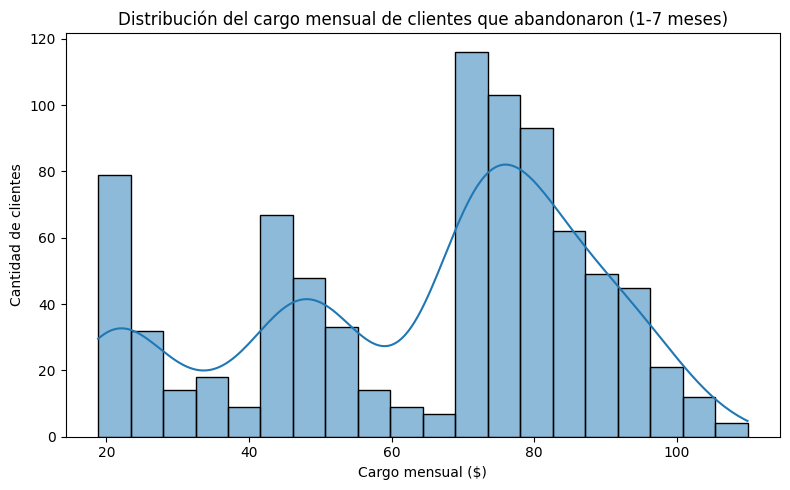

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=clientes_abandonan_7meses,
    x='cuenta.cargo_mensual',
    bins=20,
    kde=True
)
plt.title('Distribución del cargo mensual de clientes que abandonaron (1-7 meses)')
plt.xlabel('Cargo mensual ($)')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


#📄Informe final

Análisis de Abandono de Clientes (1–7 meses)
1. ¿Por qué los clientes se van de la compañía?

A partir del análisis de los clientes que abandonaron el servicio entre 1 y 7 meses de permanencia, se identifican patrones consistentes que explican su decisión de salida:

🔹 Tipo de contrato

    Mayoría con contrato "Month-to-month".

    Baja fidelización: los clientes tienen completa libertad para abandonar en cualquier momento.

    El tipo de contrato flexible es el principal facilitador del abandono.

🔹 Tipo de servicio de internet

    Predomina el uso de "Fiber optic", un servicio de mayor costo.

    Si la calidad, soporte o percepción de valor no acompaña ese costo, los clientes optan por cancelar rápidamente.

🔹 Método de pago

    Destaca el uso de "Electronic check", asociado a usuarios menos comprometidos con automatización o permanencia.

    Los pagos manuales se correlacionan con menor lealtad y mayor disposición al cambio.

🔹 Servicios adicionales contratados

    Se evidencia una baja contratación de servicios de valor agregado, como:

        Seguridad en línea.

        Soporte técnico.

        Streaming de TV o películas.

    Estos clientes usan el servicio de forma básica y prescindible, sin vínculos adicionales con la empresa.

🔹 Cargo mensual

    Muchos clientes presentan cargos mensuales moderadamente altos (entre $60 y $90).

    Sin beneficios ni servicios diferenciadores, este precio puede considerarse elevado y motivar la cancelación.

2. ¿Por qué se van dentro de los primeros 3 a 7 meses?

Este período es especialmente crítico. La mayoría de los abandonos en este rango reflejan fallas en la experiencia temprana del cliente:
🔍 Falta de integración y retención inicial

    No hay evidencias de estrategias de onboarding, seguimiento o programas de fidelización en los primeros meses.

📉 Baja percepción de valor

    El servicio es caro para lo que ofrece.

    No hay soporte ni valor añadido que justifique continuar.

💳 Bajo compromiso contractual y de pago

    Contrato mes a mes + pago manual = libertad total para salir ante la mínima insatisfacción.

3. Conclusión

Los clientes se van —y se van temprano— por una combinación de:

    Contratos flexibles sin compromiso.

    Precios altos sin beneficios percibidos.

    Cero retención temprana ni activación de servicios adicionales.

    Métodos de pago que reflejan bajo involucramiento.